In [1]:
import pandas as pd
import numpy as np

In [2]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

In [3]:
df = pd.read_csv(url)

In [4]:
df.drop(columns=['Lat', 'Long'], inplace=True)

In [5]:
df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,21,22,22,22,24,24,40,40,74,84
1,NaN,Albania,0,0,0,0,0,0,0,0,...,51,55,59,64,70,76,89,104,123,146
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,54,60,74,87,90,139,201,230,264,302
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,2,39,39,53,75,88,113,133,164,188
4,NaN,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2,2,3,3,3


In [6]:
countries = df["Country/Region"].unique()

In [7]:
countries.sort()

In [8]:
countries

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'H

# Switzerland

In [9]:
swiss = df[df["Country/Region"] == "Switzerland"].drop(columns=["Country/Region"]).stack().droplevel(level=0)

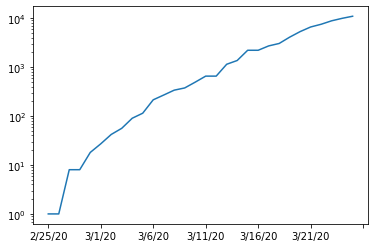

In [10]:
swiss[swiss!=0].plot(logy=True)

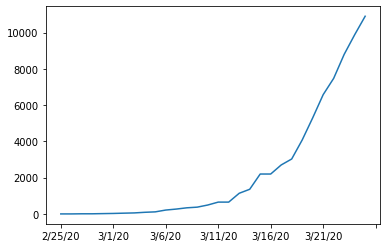

In [11]:
swiss[swiss!=0].plot()

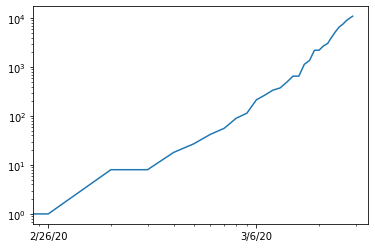

In [12]:
swiss[swiss!=0].plot(logy=True, logx=True)

# Europe

In [13]:
italy = df[df["Country/Region"] == "Italy"].drop(columns=["Country/Region"]).stack().droplevel(level=0)

In [14]:
france = df[(df["Country/Region"] == "France") & (df["Province/State"].isna())].drop(columns=["Country/Region", "Province/State"]).stack().droplevel(level=0)

In [15]:
uk = df[(df["Country/Region"] == "United Kingdom") & (df["Province/State"] == "United Kingdom")].drop(columns=["Country/Region", "Province/State"]).stack().droplevel(level=0)

In [16]:
# france.drop(columns=["Country/Region"], inplace=True)

In [17]:
# france = france.stack().droplevel(level=0)

In [18]:
spain = df[df["Country/Region"] == "Spain"].drop(columns=["Country/Region"]).stack().droplevel(level=0)

In [19]:
germany =  df[df["Country/Region"] == "Germany"].drop(columns=["Country/Region"]).stack().droplevel(level=0)

In [20]:
austria =  df[df["Country/Region"] == "Austria"].drop(columns=["Country/Region"]).stack().droplevel(level=0)

In [21]:
europe = pd.concat([swiss, italy, france, germany, austria, spain, uk], axis=1)

In [22]:
europe.columns = ['Switzerland', 'Italy', 'France', 'Germany', 'Austria', 'Spain', 'UK']

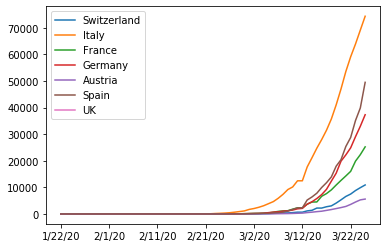

In [23]:
europe.plot()

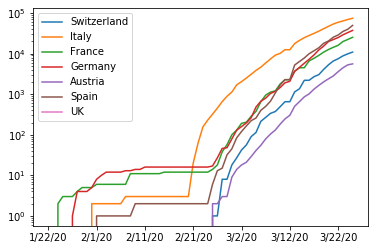

In [24]:
europe.plot(logy=True)

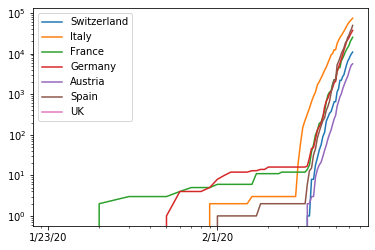

In [25]:
europe.plot(logy=True, logx=True)

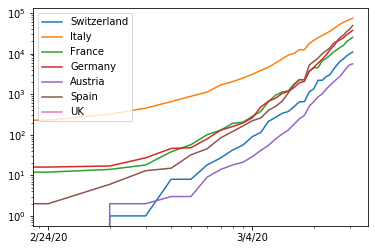

In [26]:
europe[32:].plot(logy=True, logx=True)

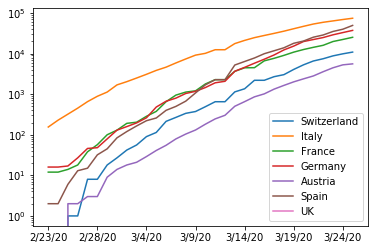

In [27]:
europe[32:].plot(logy=True)

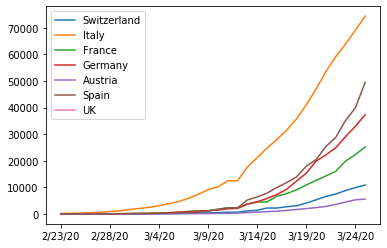

In [28]:
europe[32:].plot()

# USA

In [29]:
us = df[df["Country/Region"] == "US"].groupby(by=["Country/Region",]).sum().stack().droplevel(level=0)

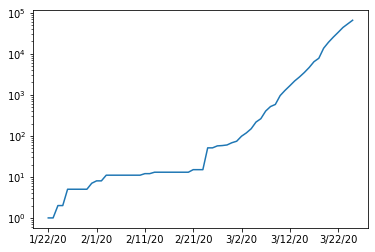

In [30]:
us[us!=0].plot(logy=True)

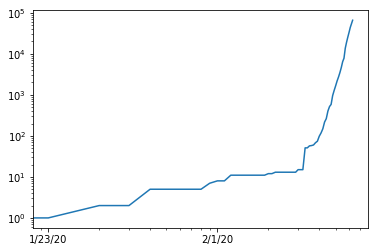

In [31]:
us[us!=0].plot(logy=True, logx=True)

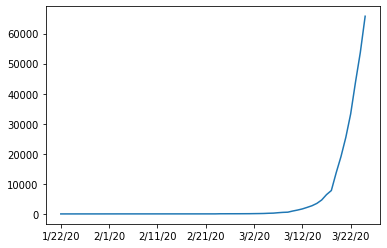

In [32]:
us[us!=0].plot()

In [33]:
df3 = pd.concat([europe, us], axis=1)

# Europe + USA

In [34]:
col = list(df3.columns)

In [35]:
col[col.index(0)] = 'USA'

In [36]:
df3.columns = col

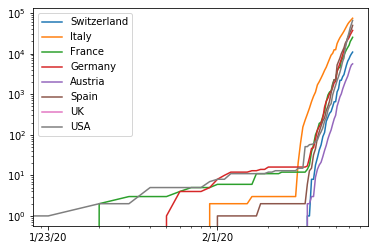

In [37]:
df3.plot(logy=True, logx=True)

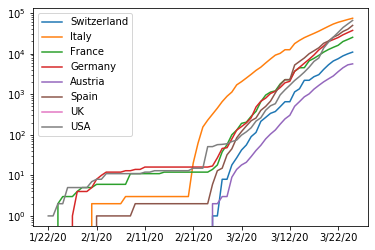

In [38]:
df3.plot(logy=True)

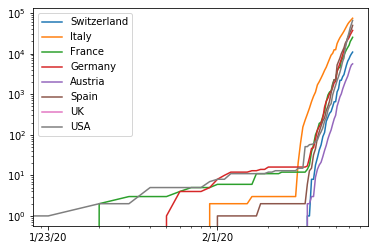

In [39]:
df3.plot(logy=True, logx=True)

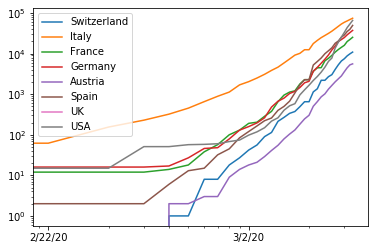

In [40]:
df3[30:].plot(logy=True, logx=True)

# Worldwide

In [41]:
df4 = df.sum(axis=0)

In [42]:
df4.drop(index=['Country/Region'], inplace=True)

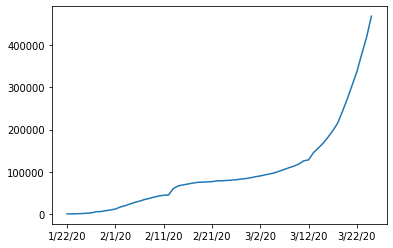

In [43]:
df4.plot()

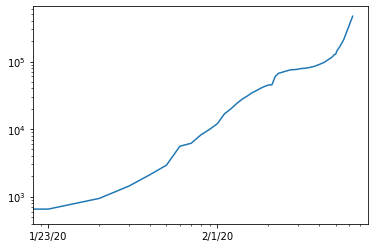

In [44]:
df4.plot(logy=True, logx=True)

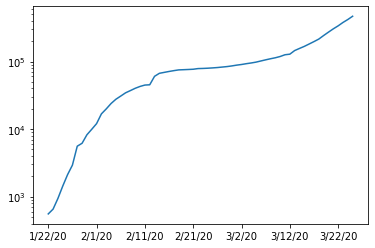

In [45]:
df4.plot(logy=True)

# Iran

In [46]:
iran = df[df["Country/Region"] == "Iran"].drop(columns=["Country/Region"]).stack().droplevel(level=0)

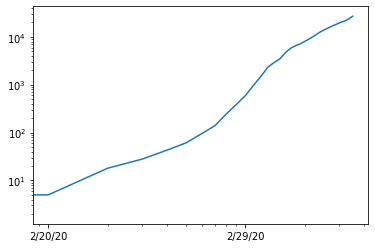

In [47]:
iran[iran!=0].plot(logy=True, logx=True)

In [48]:
df5 = pd.concat([europe, iran], axis=1)

In [49]:
df5.columns = ['Switzerland', 'Italy', 'France', 'Germany', 'Austria', 'Spain', 'UK', 'Iran']

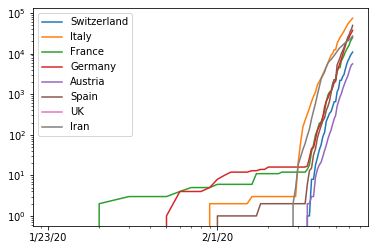

In [50]:
df5.plot(logy=True, logx=True)

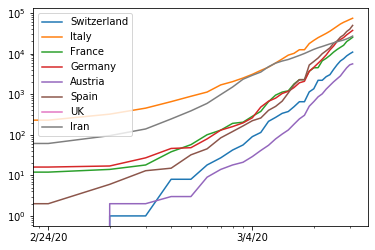

In [51]:
df5[32:].plot(logy=True, logx=True)

# China

In [52]:
china = df[df["Country/Region"] == "China"].groupby(by=["Country/Region",]).sum().stack().droplevel(level=0)

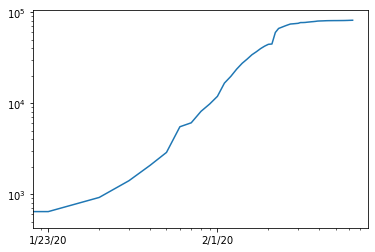

In [53]:
china.plot(logy=True, logx=True)

In [54]:
df6 = pd.concat([china, italy], axis=1)

In [55]:
df6.columns = ['China', 'Italy']

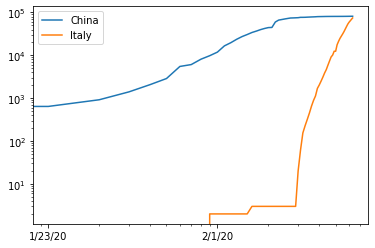

In [56]:
df6.plot(logy=True, logx=True)

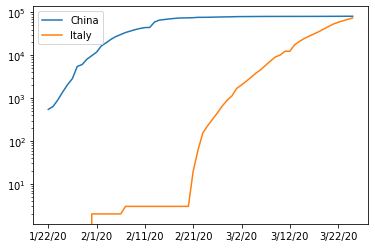

In [57]:
df6.plot(logy=True)